In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

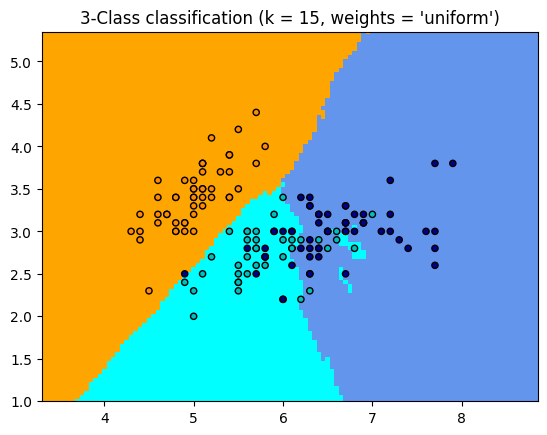

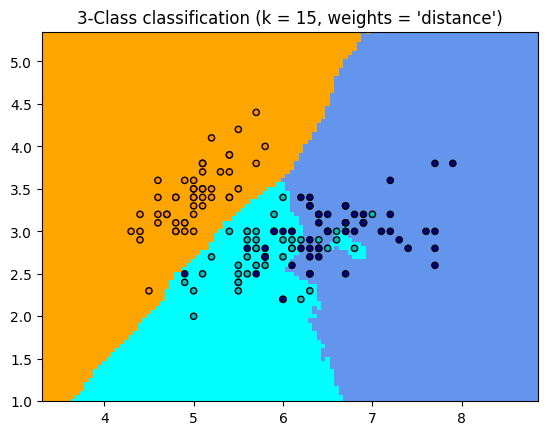

In [7]:
n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
# print(iris)
h = 0.05  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

C:\Users\Jemin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


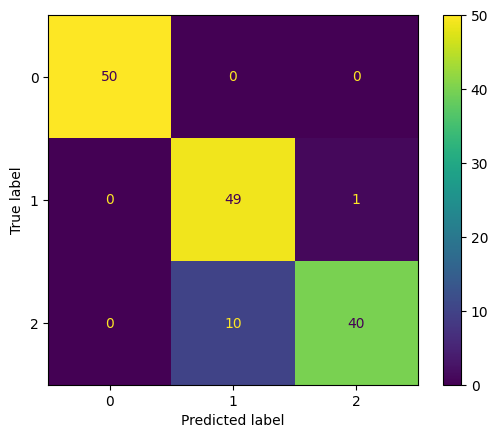

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X, y)
#clf = # define your classifier (Decision Tree, Random Forest etc.)
#clf.fit(X, y) # fit your classifier

# make predictions with your classifier
y_pred = clf.predict(X)         
# optional: get true negative (tn), false positive (fp)
# false negative (fn) and true positive (tp) from confusion matrix
#True Positives (TP): The model predicted positive and the actual label is positive
#True Negative (TN): The model predicted negative and the actual label is negative
#False Positive (FP): The model predicted positive and the actual label was negative
#False Negative (FN): The model predicted  negative and the actual label was positive
M = confusion_matrix(y, y_pred)
# tn, fp, fn, tp = M.ravel() 
# plotting the confusion matrix
plot_confusion_matrix(clf, X, y)
plt.show()

In [5]:
#print the accuracy of the model
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred))

0.9266666666666666
